In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [2]:
import os
os.chdir('../')
from function import make_data

In [3]:
df_2 = pd.read_csv('./pn500.csv')

In [4]:
dx = np.diff(df_2['V2'], axis=0)

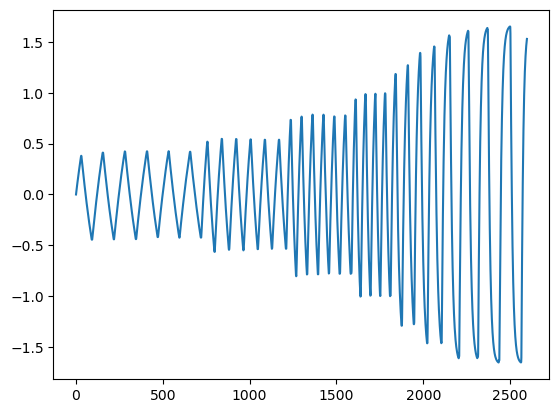

In [5]:
plt.plot(df_2['V2'])

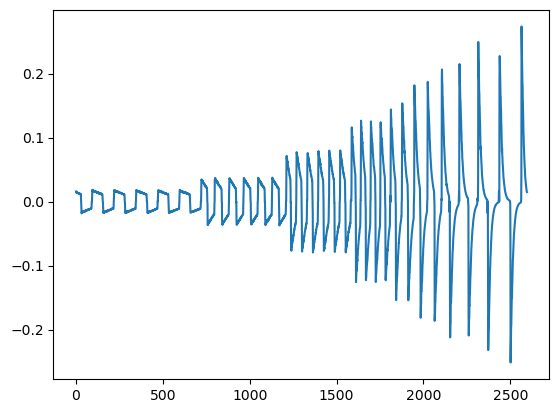

In [6]:
plt.plot(dx)

In [7]:
def eval_inc(z, dx, gamma, beta, alpha, n):
    psi = gamma + beta * np.sign(dx * z)
    dz = dx * (1-abs(z)**n * psi)
    df = (1-alpha) * dx + alpha * dz
    de = z * dx

    return dz, df, de

In [8]:
result_matrix = np.zeros((len(df_2), 4)) # z, x, f, e

In [9]:
for i in range(len(result_matrix)-1):
    res = eval_inc(result_matrix[i,1], dx[i], 0.1, 0.5, 0.001, 1)

    result_matrix[i+1,0] = result_matrix[i,0] + dx[i] # x
    result_matrix[i+1,1] = result_matrix[i,1] + res[0] # z
    result_matrix[i+1,2] = result_matrix[i,2] + res[1] # f
    result_matrix[i+1,3] = result_matrix[i,3] + res[2] # e


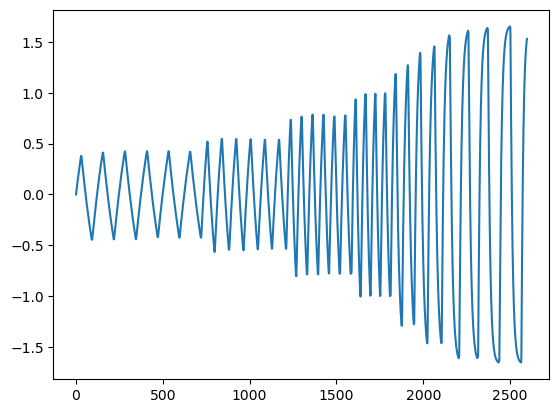

In [10]:
plt.plot(result_matrix[:,2])

-----

In [11]:
df = make_data(dt = 1, total_time = 10000)

In [12]:
train_df = df[:8000]
test_df = df[8000:]

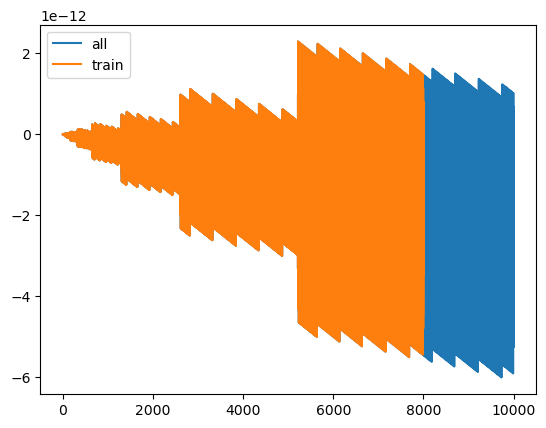

In [13]:
plt.plot(df.u)
plt.plot(train_df.u)
plt.legend(['all', 'train'])

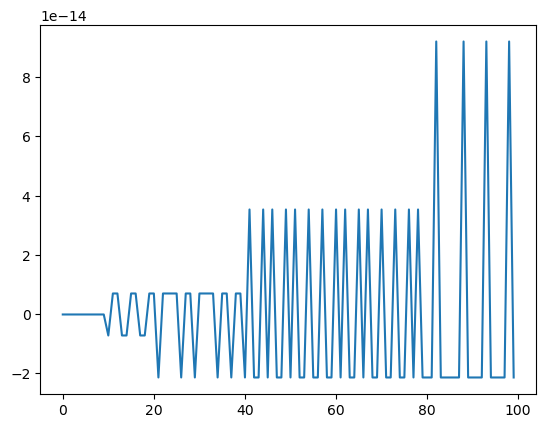

In [14]:
plt.plot(np.diff(df.u, axis=0)[:100])

In [15]:
d_x = np.diff(df.u, axis=0)

In [16]:
train_dx = d_x[:8000]
test_dx = d_x[8000:]

In [17]:
from pyswarm import pso

In [18]:
def objective_function(params, z, dx, n, target_df):
    gamma, beta, alpha = params
    _, df, _ = eval_inc(0, z, gamma, beta, alpha, n)
    return abs(df - target_df)

In [19]:
lb = [-10, -10, -10] 
ub = [10, 10, 10]    

args = (0, d_x[0], 1, df['f'][0])

In [20]:
optimized_params, _ = pso(objective_function, lb, ub, maxiter=5000, args = args)

Stopping search: maximum iterations reached --> 5000


In [21]:
gamma, beta, alpha = optimized_params

In [22]:
result_matrix_2 = np.zeros((len(df), 4)) # z, x, f, e

In [23]:
for i in range(len(result_matrix_2)-1):
    res = eval_inc(result_matrix_2[i,1], d_x[i], gamma, beta, alpha, 1)

    result_matrix_2[i+1,0] = result_matrix_2[i,0] + d_x[i] # x
    result_matrix_2[i+1,1] = result_matrix_2[i,1] + res[0] # z
    result_matrix_2[i+1,2] = result_matrix_2[i,2] + res[1] # f
    result_matrix_2[i+1,3] = result_matrix_2[i,3] + res[2] # e


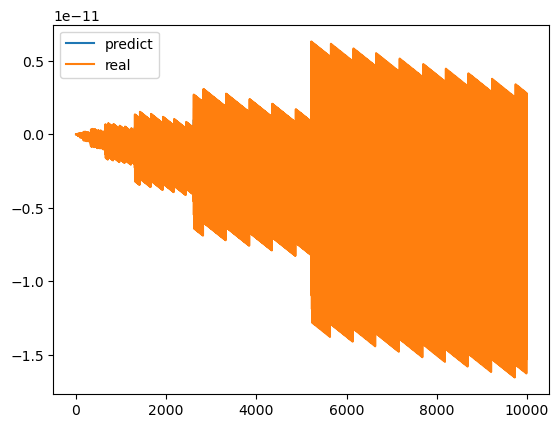

In [25]:
plt.plot(range(len(result_matrix_2)),result_matrix_2[:,2])
plt.plot(range(len(result_matrix_2)), df.f)
plt.legend(['predict', 'real'])
plt.show()

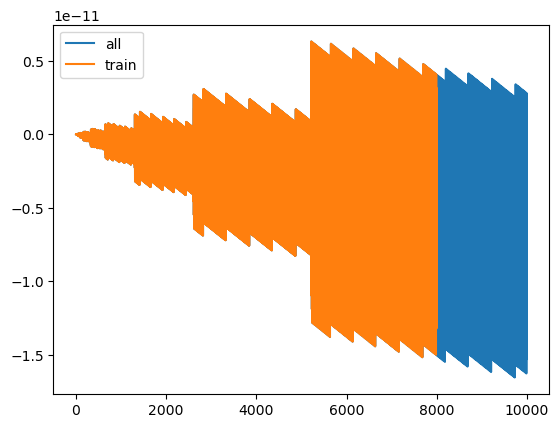

In [32]:
plt.plot(df.f)
plt.plot(train_df.f)
plt.legend(['all', 'train'])

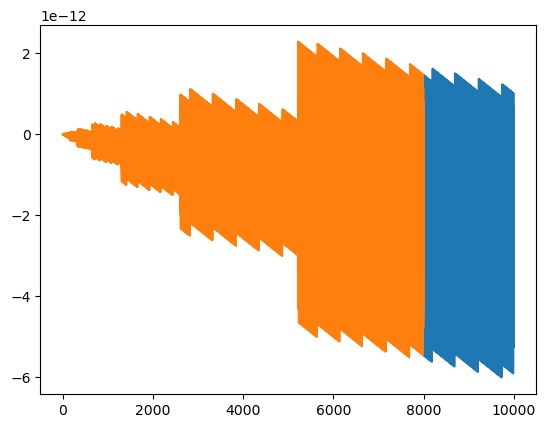

In [34]:
plt.plot(range(8000, 10000, 1),result_matrix_2[:,2][8000:10000])
plt.plot(range(0, 8000, 1), train_df.u)
#plt.plot(range(8000, 10000, 1), test_df.u[:2000])